1. Importing all required libraries

In [16]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This dataset has about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
train_path="gdrive/My Drive/CNN Assignment/Train/"
test_path="gdrive/My Drive/CNN Assignment/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


2. Data Preparation

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Train Data Set Creation

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


Validation Data Set Creation

In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


3. Visualizing the data

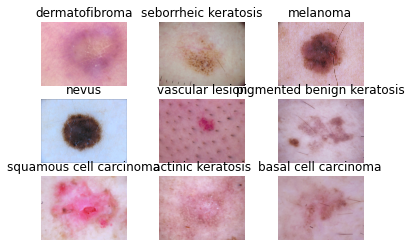

In [14]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

4. Model 1

In [16]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=0./1., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

Compiling the model

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 284s 3s/step - loss: 2.1854 - accuracy: 0.1853 - val_loss: 2.1738 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 95s 2s/step - loss: 2.1635 - accuracy: 0.1964 - val_loss: 2.1536 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 97s 2s/step - loss: 2.1441 - accuracy: 0.1964 - val_loss: 2.1358 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 97s 2s/step - loss: 2.1268 - accuracy: 0.2031 - val_loss: 2.1203 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 95s 2s/step - loss: 2.1118 - accuracy: 0.2065 - val_loss: 2.1066 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 97s 2s/step - loss: 2.0987 - accuracy: 0.2065 - val_loss: 2.0944 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 95s 2s/step - loss: 2.0871 - accuracy: 0.2065 - val_loss: 2.0840 - val_accuracy: 0.2058
Epoch 8/20
56/56 [=

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

Visualizing training results

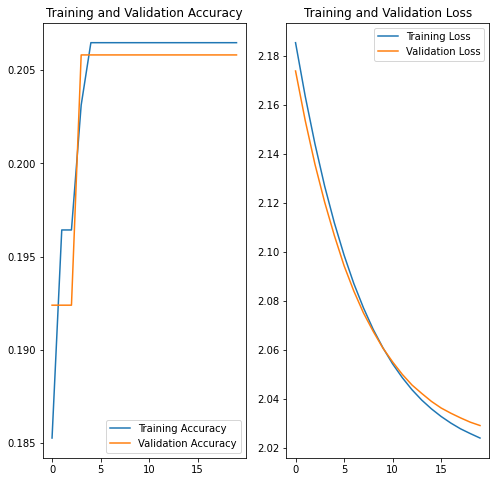

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observations -

The accuracy of the model for the Training data set is at 20% validation 
accuracy is 20%.
By adding a few more layers, we could improve the accuracy by trying to extract more features.

5. Model 2

In [18]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=0./1., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [19]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [21]:
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 380s 7s/step - loss: 2.1850 - accuracy: 0.1959 - val_loss: 2.1740 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 380s 7s/step - loss: 2.1630 - accuracy: 0.2065 - val_loss: 2.1531 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 374s 7s/step - loss: 2.1435 - accuracy: 0.2065 - val_loss: 2.1355 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 373s 7s/step - loss: 2.1264 - accuracy: 0.2065 - val_loss: 2.1196 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 372s 7s/step - loss: 2.1113 - accuracy: 0.2065 - val_loss: 2.1063 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 371s 7s/step - loss: 2.0983 - accuracy: 0.2065 - val_loss: 2.0939 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 372s 7s/step - loss: 2.0868 - accuracy: 0.2065 - val_loss: 2.0839 - val_accuracy: 0.2058
Epoch 8/20
56

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

6. Data Augmentation

In [21]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

Visualizing the Augmented Data

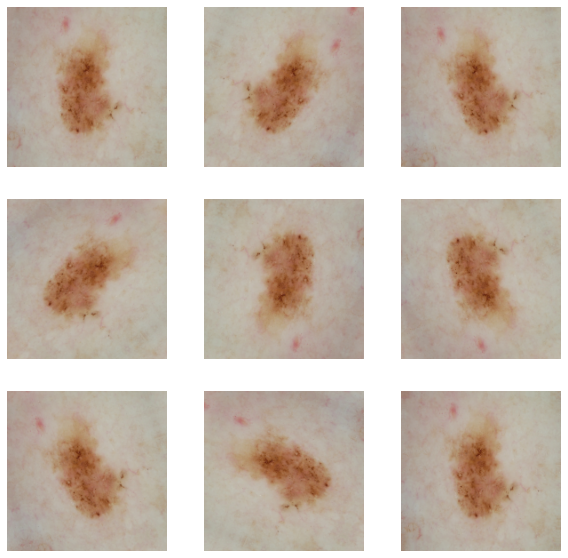

In [22]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

7. Model 3

In [26]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=0/1, offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(32,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
  
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [27]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 400s 7s/step - loss: 2.1863 - accuracy: 0.1920 - val_loss: 2.1747 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 394s 7s/step - loss: 2.1643 - accuracy: 0.1914 - val_loss: 2.1542 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 396s 7s/step - loss: 2.1446 - accuracy: 0.2065 - val_loss: 2.1364 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 396s 7s/step - loss: 2.1274 - accuracy: 0.2065 - val_loss: 2.1205 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 400s 7s/step - loss: 2.1123 - accuracy: 0.2065 - val_loss: 2.1067 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 400s 7s/step - loss: 2.0990 - accuracy: 0.2065 - val_loss: 2.0948 - val_accuracy: 0.2058
Epoch 7/20
45/56 [=======================>......] - ETA: 1:14 - loss: 2.0900 - accuracy: 0.2062

KeyboardInterrupt: ignored

In [2]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

8. Checking for Class Imbalance

In [13]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


9. Using Augmentor for Class Imbalance Treatment

In [17]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3321CB2FD0>: 100%|██████████| 500/500 [00:21<00:00, 23.03 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F331C7A2150>: 100%|██████████| 500/500 [00:25<00:00, 19.51 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3317B88C90>: 100%|██████████| 500/500 [00:22<00:00, 21.76 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3317B885D0>: 100%|██████████| 500/500 [01:46<00:00,  4.68 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F3317B6E390>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3317BC7050>: 100%|██████████| 500/500 [00:22<00:00, 22.19 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3317B69950>: 100%|██████████| 500/500 [00:50<00:00,  9.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3317B41790>: 100%|██████████| 500/500 [00:23<00:00, 21.58 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3324FBE3D0>: 100%|██████████| 500/500 [00:22<00:00, 22.17 Samples/s]


In [19]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [20]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [21]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [22]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [23]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


10. Modelling Augmented Data

In [24]:
batch_size = 32
img_height = 180
img_width = 180

In [25]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [33]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=0./1., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(32,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),   
    Dense(9, activation='softmax')
])

In [34]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
epochs = 20
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 1221s 7s/step - loss: 2.1920 - accuracy: 0.1358 - val_loss: 2.1907 - val_accuracy: 0.1403
Epoch 2/20
 72/169 [===========>..................] - ETA: 11:03 - loss: 2.1869 - accuracy: 0.1419

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observations



The training accuracy seems to be nearly ~90%.
The validation accuracy is nearly ~80%.

Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.

Much better models could be built or tried out using more epochs and more layers.

